In [1]:
from shadow.plot import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import json
from yvsyplot import *
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# add_custom_fonts(loc=".myfonts")

Props:  ['annealing', 'BulkModulus', 'Density', 'Hardness_misc', 'Hardness_RT', 'Refractive_misc', 'Shear_modulus', 'softening', 'TLiq', 'Littleton', 'TEC', 'TG', 'YM', 'ND']
annealing
523.3542857142858
0.9740000000000001 0.946
366.62713164907694 530.6430559381748
19.147509802819712 23.035690915146755
12.886184285714286 18.93155916666666
----


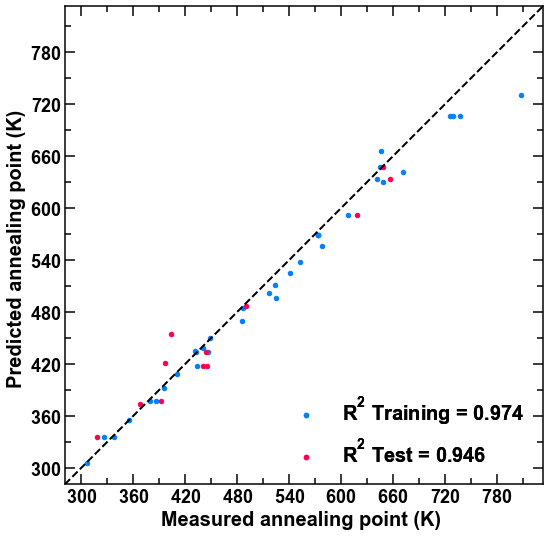

BulkModulus
45730572916.66667
0.988 0.955
1.5252105303154006e+19 5.5935255583810126e+20
3905394385.0978746 23650635421.44484
2665626598.214286 12026688210.526316
----


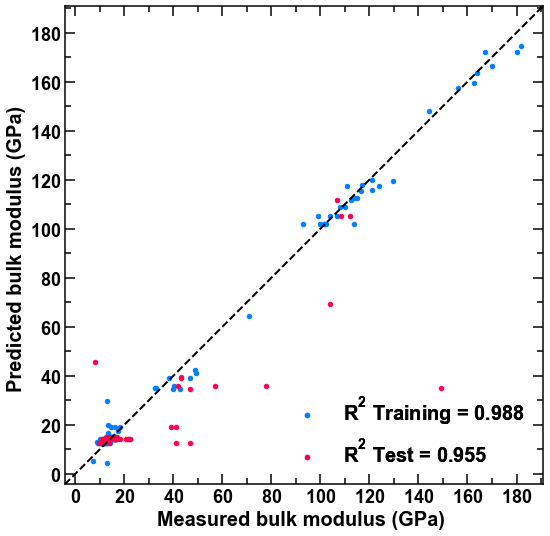

Density
4.464687536623853
0.99 0.927
0.010362507790544121 0.08280333612753023
0.10179640362283984 0.2877556882626827
0.06710404830288486 0.14987127183992746
----


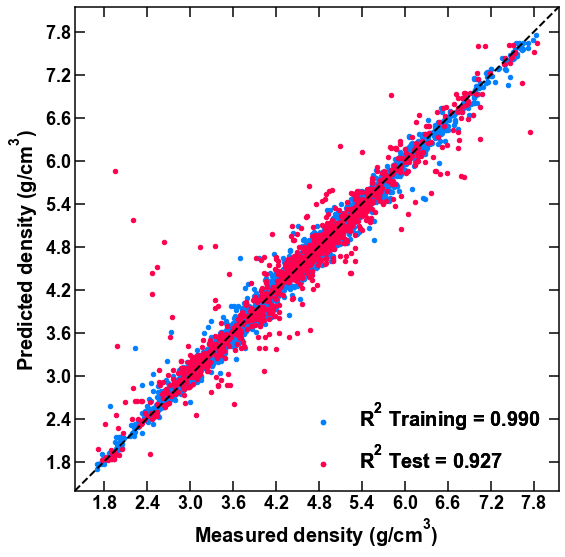

Hardness_misc
Hardness_RT
1.8731946945282136
0.985 0.94
0.04120803980124444 0.19343521507028022
0.20299763496465775 0.4398127045348738
0.14516998838709125 0.26611922704495905
----


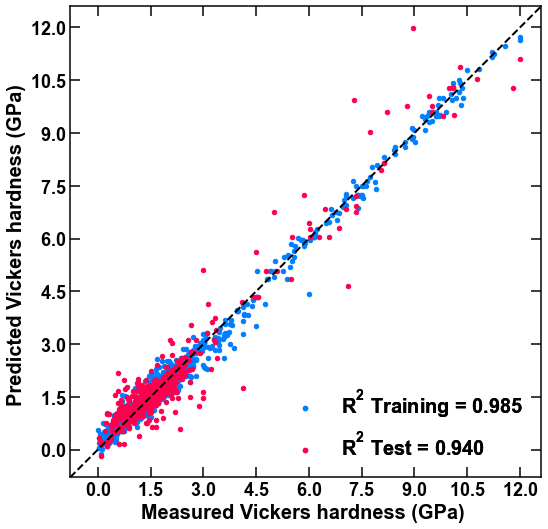

Refractive_misc
Shear_modulus
9.805232985005066
0.9470000000000001 0.74
3.1507765475443863 16.577773627363094
1.7750426889357862 4.071581219546418
1.1257339777017898 1.849374955319149
----


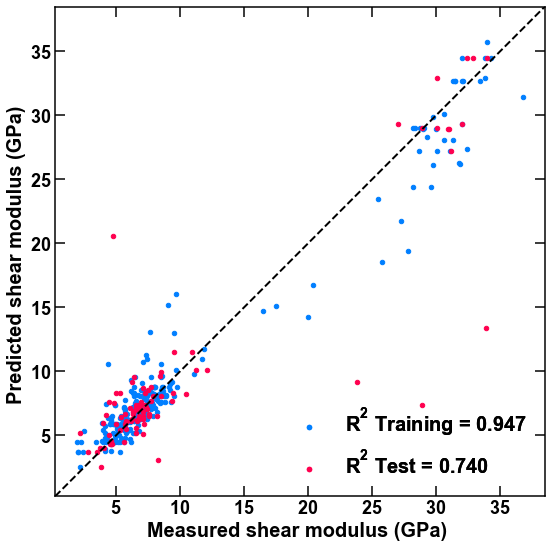

softening
536.4059317457564
0.985 0.8190000000000001
236.18472733149392 2867.6999160277646
15.368302682192784 53.550909572366415
10.754588646125468 35.680554734999994
----


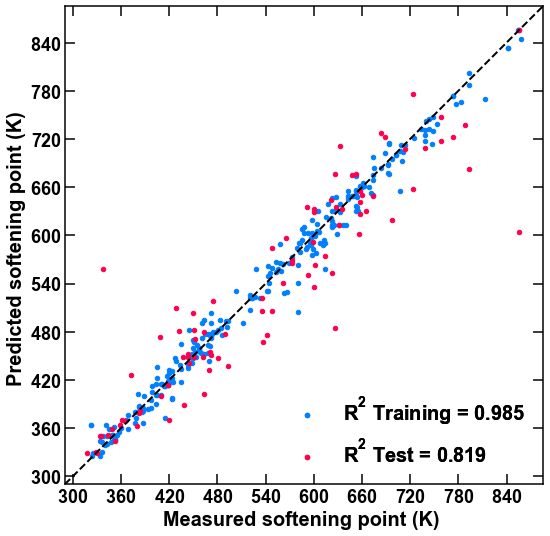

TLiq
956.3154835304681
0.9790000000000001 0.9109999999999999
1633.8195672480017 6432.26675221776
40.42053398024328 80.20141365473404
28.06870871069348 53.79936114583335
----


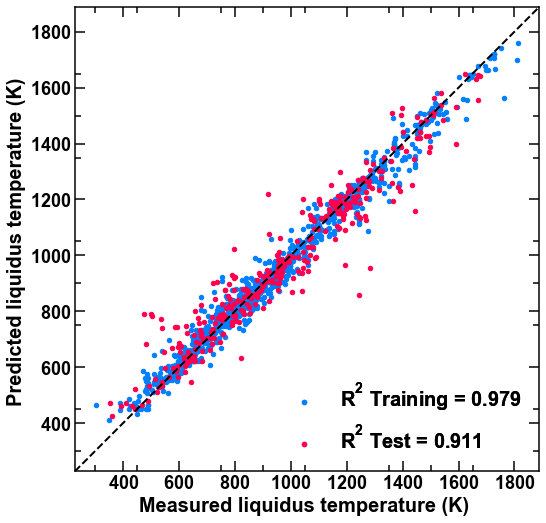

Littleton
639.4407407407407
0.9940000000000001 0.892
111.98528535502673 2163.479028284142
10.582310019793727 46.51321348051693
7.5762291851851895 32.254582222222226
----


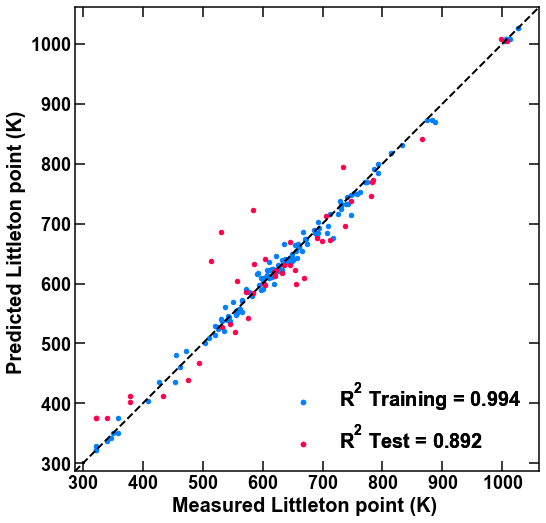

TEC
2.2977071905954216
0.87 0.737
0.004224675318140097 0.017999268375859443
0.06499750239924683 0.1341613520200935
0.0443543962128827 0.07879155706765072
----


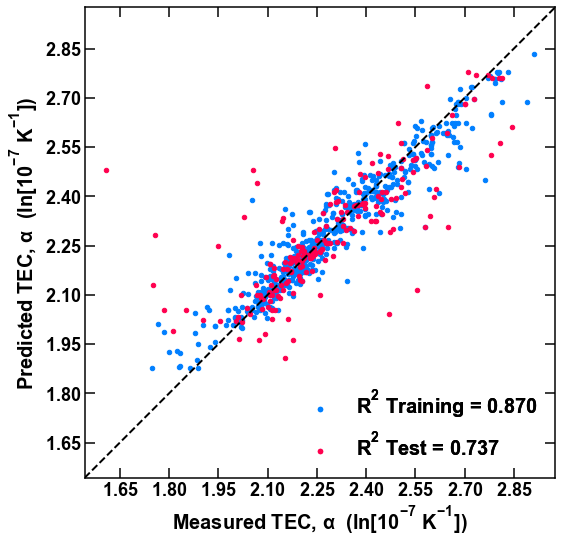

TG
507.33872959426026
0.958 0.893
673.3118856878657 1778.169849716088
25.948254000758233 42.16835128050524
15.346012414391524 24.31582871378584
----


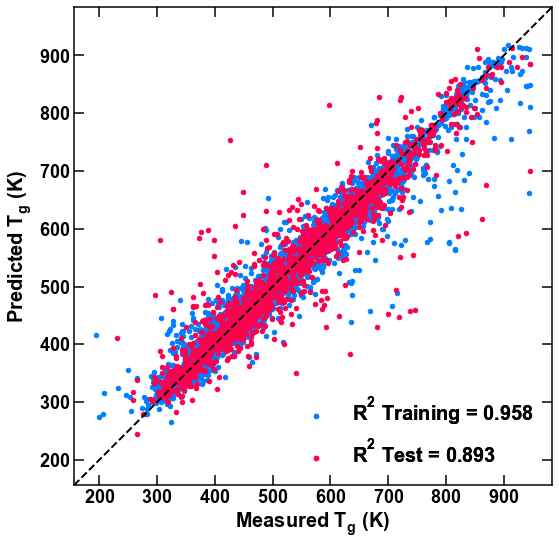

YM
51.38536155202822
0.917 0.895
218.3351332691327 456.5303547270703
14.776167746379056 21.36657096323765
9.617194805996473 12.59277013425926
----


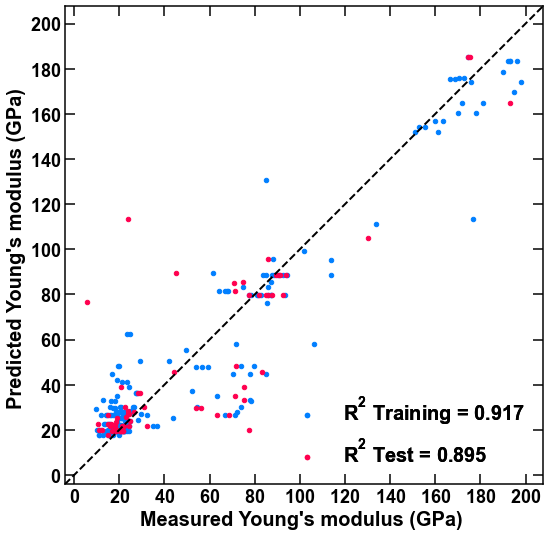

ND
2.4872345477265747
0.982 0.883
0.0036742162625765973 0.020840976114521615
0.06061531376291471 0.14436404024036462
0.04320258192012289 0.0929975079301075
----


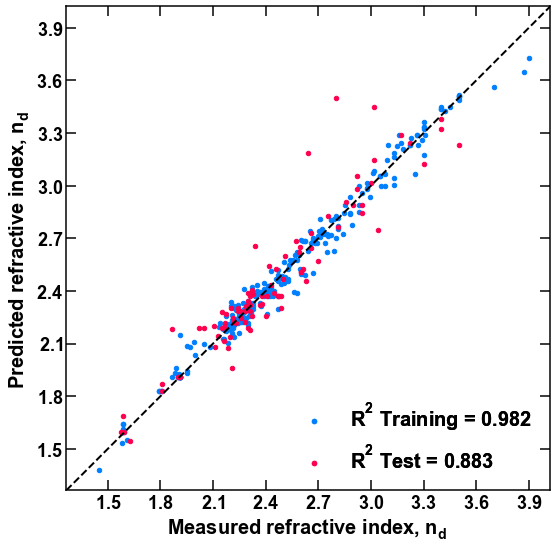

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    print('MSE: ', mse)
    return mse

R2_ = pd.read_csv("./R2.csv") # YM & TEC old used for plots2
info = json.load(open("./info.json")) #has values of plot formatting variables corresponding to each property
props = list(R2_["Property"])
print("Props: ", props)

dict_ =  {'annealing': 1,'BulkModulus': 2,'Density' : 2,'Littleton': 3,'ND' : 3 ,'Shear_modulus': 3,'softening': 3,'TEC':4,'TG':1,'TLiq': 1,'YM':4,'Hardness_RT': 4}


data = r'/Users/sayamsingla/Desktop/SURA/chalcogenide_glasses/train_test'

for i in props[:]: 
    try: 
        print(i)
        info_ = info[i]
        info_['scale'] = info_['prop_scale']
        info_['label'] = info_['label_name']
        label = info_['label']

        mask = R2_["Property"].values==i
        R2_test = R2_[mask]["Test_R2"].values[0]
        R2_train = R2_[mask]["Train_R2"].values[0]
    #     d_train = data + i + '/' + i + str(dict_[i]) + '_train2.csv'
    #     d_test = data + i + '/' + i + str(dict_[i]) + '_test2.csv'
        d_train = f'{data}/{i}_{str(dict_[i])}_train2.csv'
        d_test  = f'{data}/{i}_{str(dict_[i])}_test2.csv' 

        data_test = pd.read_csv(d_test)  
        data_train = pd.read_csv(d_train)#

        train_ac = data_train["y_ac"].values
        train_pr = data_train["y_pr"].values

        y_ac = data_test["y_ac"].values
        y_pr = data_test["y_pr"].values

        print(np.mean(train_ac))
        print(R2_train, R2_test)
        mse_train = mean_squared_error(train_ac, train_pr)
        mse_test = mean_squared_error(y_ac, y_pr)

        rmse_train = np.sqrt(mean_squared_error(train_ac, train_pr))
        rmse_test = np.sqrt(mean_squared_error(y_ac, y_pr))

        mae_train = mean_absolute_error(train_ac, train_pr)
        mae_test = mean_absolute_error(y_ac, y_pr)
        print(mse_train, mse_test)
        print(rmse_train, rmse_test)
        print(mae_train, mae_test)
        print("----")


        if i == 'annealing':
            l ,b = 30, 60

        if i == 'BulkModulus':
            train_ac = train_ac/10**9
            train_pr = train_pr/10**9
            y_ac = y_ac/10**9
            y_pr = y_pr/10**9
            l ,b = 10, 20
        if i == 'Density':
            l ,b = .60, .60
        if i == 'Hardness_RT' or i == 'Hardness_misc':
            l ,b = 1.5, 1.5
        if i == 'Refractive_misc':
            l, b = 0.2, 0.2
        if i== 'Shear_modulus':
            l, b, = 5, 5
        if i== 'softening':
            l, b, = 60, 60
        if i== 'TLiq':
            l, b, = 150, 200
        if i == 'Littleton':
            l,b = 100,100
        if i == 'TG':
            l ,b = 100 , 100
        if i== 'TEC':
            l ,b = .15, .15
        if i== 'YM':
            l ,b = 20, 20
        if i== 'ND':
            l ,b = .30, .30


    #     print(len(y_ac) , len(y_pr))


        rng = [min(y_ac.min(), y_pr.min()) - info_['margin'], max(y_ac.max(), y_pr.max()) + info_['margin'],]
        info_['limits'] = rng


#         markerfacecolor= "blue" #FF004F
        fig, ax = plt.subplots()
        ax.scatter(train_ac,train_pr,c = '#007FFF', s=20)
        ax.scatter(y_ac,y_pr,c =  '#FF004F', s=20)#markersize=10)
        #markersize=10)


        plt.gca().set_aspect('equal','box')
#         ax.grid(b=True, which='major')
        ax.tick_params(direction='in',axis='x',which='both')

        lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
        fl = plt.legend(['R$^2$ Training = %0.3f'%(R2_train),'R$^2$ Test = %0.3f'%(R2_test)] ,loc = 4)
        plt.gca().add_artist(fl)
        ax.plot(lims,lims,'--k',lw=2)
        ax.set_xlim(lims)
    #     l ,b = 0.30, 0.30
        ax.xaxis.set_minor_locator(MultipleLocator(l))
        ax.xaxis.set_major_locator(MultipleLocator(b))

        ax.set_ylim(lims)
        ax.yaxis.set_minor_locator(MultipleLocator(l))
        ax.yaxis.set_major_locator(MultipleLocator(b))

        ax.tick_params(direction='in',axis='y',which='both')
        

        fig.tight_layout()

        fig = plt.gcf()
        fig.set_size_inches(8,8)

    #     lims = [min(min(y_ac) , min(y_pr)), max(max(y_ac) , max(y_pr))]
    #     plt.plot(lims, lims,color='grey', linestyle='dashed', alpha=1, zorder= .1)

    #     plt.annotate('Training (R$^2$={:.2f})'.format(R2_train), xy=(0.97, 0.11),xycoords='axes fraction', fontsize=20, horizontalalignment='right', verticalalignment='bottom')
    #     plt.annotate('Testing (R$^2$={:.2f})'.format(R2_test), xy=(0.97, 0.03),xycoords='axes fraction', fontsize=20, horizontalalignment='right', verticalalignment='bottom')
        plt.xlabel('Measured '+label.replace('*',''))
        plt.ylabel('Predicted '+label.replace('*',''))

    #     ax.set_xlim(lims)
    #     ax.set_ylim(lims)
    #     ax.set_aspect('equal')
    #     plt.axis('equal')
    #     plt.xlim(min(min(train_ac) , min(train_pr)), max(max(train_ac) , max(train_pr)))
    #     plt.ylim(min(min(train_ac) , min(train_pr)), max(max(train_ac) , max(train_pr)))
    #     plt.axis('equal')
        plt.savefig('plots3/' + i +"_denplot.png", dpi=1200)
        plt.show()
    # 
    #     
    except: 
        continue

In [ ]:
data = '/home/textile/btech/tt1191091/SURA/chalco/chalco_results2/'
i = 'Hardness_misc'
dict_ ={}
dict_[i] = 1
d_train = data + i + '/' + i + str(dict_[i]) + '_train.csv'
d_test = data + i + '/' + i + str(dict_[i]) + '_test.csv'
data + i + '/' + i +"_denplot.png"